<img src="https://www.th-koeln.de/img/logo.svg" style="float:right;" width="200">

# 1st exercise: <font color="#C70039">Work with standard deviations for anomaly detection</font>
* Course: AML
* Lecturer: <a href="https://www.gernotheisenberg.de/">Gernot Heisenberg</a>
* Author of notebook: Lena Pickartz (11330741)
* Date: 23.10.2024


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Standard_deviation_diagram.svg/1200px-Standard_deviation_diagram.svg.png" style="float: center;" width="450">

---------------------------------
**GENERAL NOTE 1**:
Please make sure you are reading the entire notebook, since it contains a lot of information on your tasks (e.g. regarding the set of certain paramaters or a specific computational trick), and the written mark downs as well as comments contain a lot of information on how things work together as a whole.

**GENERAL NOTE 2**:
* Please, when commenting source code, just use English language only.
* When describing an observation please use English language, too
* This applies to all exercises throughout this course.  

---------------------

### <font color="ce33ff">DESCRIPTION</font>:
This notebook allows you for getting into standard deviations as a common technique to detect anomalies when the data is normally distributed.

-------------------------------------------------------------------------------------------------------------

### <font color="FFC300">TASKS</font>:
The tasks that you need to work on within this notebook are always indicated below as bullet points.
If a task is more challenging and consists of several steps, this is indicated as well.
Make sure you have worked down the task list and commented your doings.
This should be done by using markdown.<br>
<font color=red>Make sure you don't forget to specify your name and your matriculation number in the notebook.</font>

**YOUR TASKS in this exercise are as follows**:
1. import the notebook to Google Colab or use your local machine.
2. make sure you specified you name and your matriculation number in the header below my name and date.
    * set the date too and remove mine.
3. read the entire notebook carefully
    * add comments whereever you feel it necessary for better understanding
    * run the notebook for the first time.
    * understand the output
4. go and find three different data sets on the web
    * kaggle.com might be a good source (they also offer an API for data download)
    * make sure two of the three data sets are normally distributed
    * download one data set that is not normally distributed
5. visualize the data
6. compute the anomalies
7. visualize the anomalies
8. does the 0,3% rule apply?
9. what are differences between the normally distributed and the non-normally distributed data sets with respect to the outlier detection?
10. which statement can be made and which cannot?
-----------------------------------------------------------------------------------

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randn
np.random.seed(1)

In [ ]:
# Function to Detection Outlier on one-dimentional datasets.
def find_anomalies(random_data):
    #define a list to accumlate anomalies
    anomalies = []

    # Set upper and lower limit to 3 standard deviation
    random_data_std = np.std(random_data)
    random_data_mean = np.mean(random_data)
    anomaly_cut_off = random_data_std * 3

    lower_limit  = random_data_mean - anomaly_cut_off
    upper_limit = random_data_mean + anomaly_cut_off

    print("lower limit=", round(lower_limit,8))
    print("upper limit=", round(upper_limit,8))

    # Generate outliers list
    for outlier in random_data:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)

    return anomalies

In [ ]:
# multiply and add by random numbers to get some real values
# randn generates samples from the normal distribution (important - see below)
data = np.random.randn(50000)  * 20 + 20

In [ ]:
anomalies = find_anomalies(data)

lower limit= -39.96482266
upper limit= 80.11636225


## Result
These anomalies are exceeding the lower and upper 3rd scatter range.
Thus, statistically spoken, they do belong to a population size of less than 0,3% of the entire data set!
For sure, the above conclusion is true if and only if the data is normally distributed!


In [ ]:
print(anomalies)

[80.61714224744061, 99.17205408075927, 86.4215751234073, -41.0752876085261, -43.06714900382097, -40.32063970418597, 88.65326863591119, -41.28282712210201, 94.80497807409178, 82.70094680175814, 84.76686393504752, -45.06068469953237, 82.64059456281011, 80.25509136474466, -43.81232693648161, -45.21230191553079, 88.08604551497943, 82.369591815651, 85.9708104656157, 82.97968050439259, -45.8971681339703, -41.11266480828613, 100.53698089094755, -44.38264211247683, 82.23783662033449, 92.26554014166295, 87.96231313004853, 91.21746641411097, -53.128801985095905, -45.641575926212354, 91.21225295344836, -43.46923274683489, 82.13498657145581, 82.90737927394908, -46.216851244091984, -41.9565310384887, -45.6065519410858, 80.5243698860871, -43.30420249353775, -42.25263324372853, 81.59215546151304, 103.36235355910189, 96.68762041821407, -40.586879558462776, -48.71851620008829, -45.18412137279293, 81.54158108441533, 84.5587224070789, -40.7688517191754, -44.08128900692253, -42.043297873881315, 87.7143031

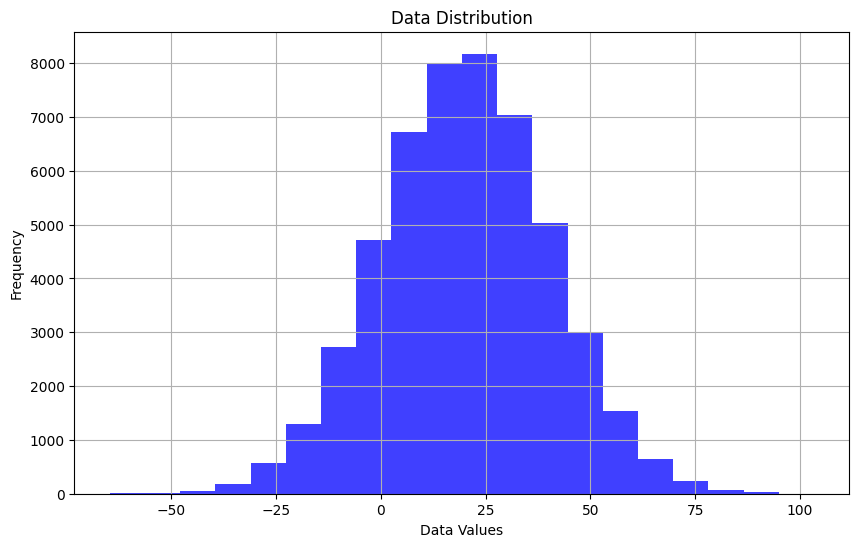

In [ ]:
# Plot the histogram of the data
plt.figure(figsize=(10,6))
plt.hist(data, bins=20, alpha=0.75, color='blue')
plt.title("Data Distribution")
plt.xlabel("Data Values")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

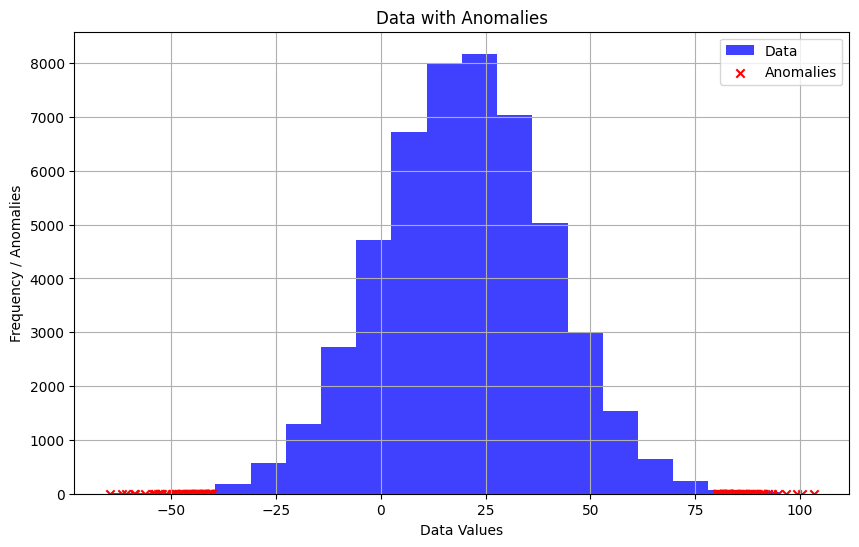

In [ ]:
# Plot the anomalies
plt.figure(figsize=(10,6))
plt.hist(data, bins=20, alpha=0.75, color='blue', label="Data")
plt.scatter(anomalies, np.zeros_like(anomalies) - 0.01, color='red', label="Anomalies", marker='x')
plt.title("Data with Anomalies")
plt.xlabel("Data Values")
plt.ylabel("Frequency / Anomalies")
plt.legend()
plt.grid(True)
plt.show()

# Data Set 1: Resting Blood Pressure

In [ ]:
#Access the dataset (Source = https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset)
url_1 = 'https://raw.githubusercontent.com/len-rtz/AML/refs/heads/main/data/heart.csv'

# Load the dataset
df_1 = pd.read_csv(url_1)

# Inspect the dataset to see the column names
print(df_1.columns)

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')


In [ ]:
# Extract the resting blood pressure (in mm Hg) column and drop missing values
heart_rate_data = df_1['trtbps'].dropna()

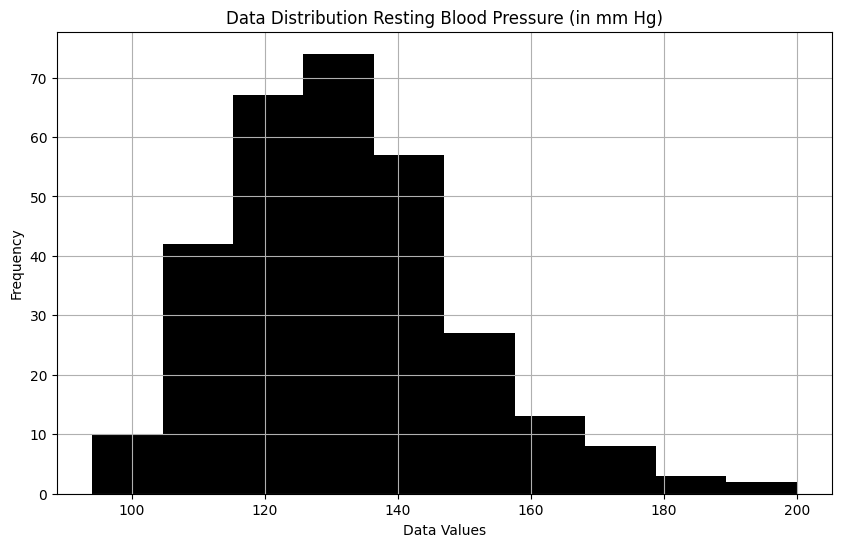

In [ ]:
# Plot the histogram of the data
plt.figure(figsize=(10,6))
plt.hist(heart_rate_data, bins=10, color='black')
plt.title("Data Distribution Resting Blood Pressure (in mm Hg)")
plt.xlabel("Data Values")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [ ]:
# Convert the data to numpy array
heart_rate_data = np.array(heart_rate_data)

# Find anomalies in the data
anomalies_1 = find_anomalies(heart_rate_data)

print(anomalies_1)

lower limit= 79.09622818
upper limit= 184.15129657
[200, 192]


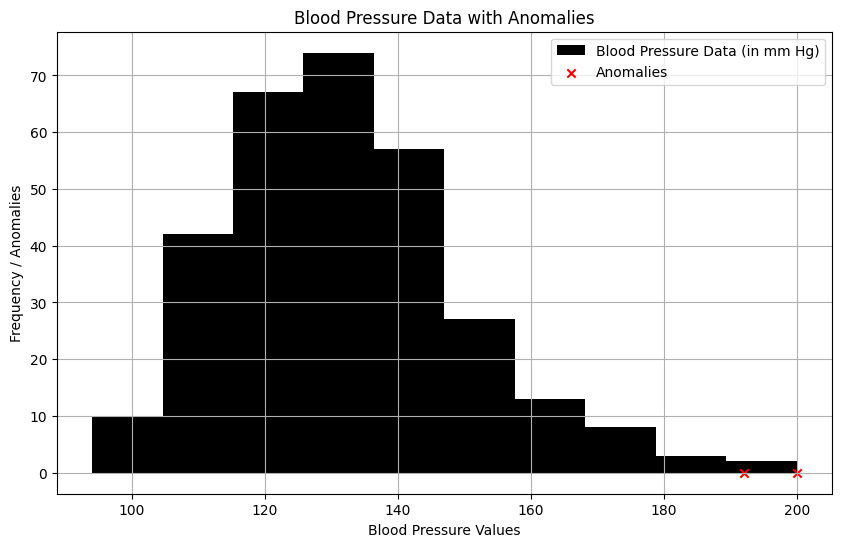

In [ ]:
# Visualize the Data with Anomalies
plt.figure(figsize=(10,6))
plt.hist(heart_rate_data, bins=10, color='black', label="Blood Pressure Data (in mm Hg)")
plt.scatter(anomalies_1, np.zeros_like(anomalies_1) - 0.01, color='red', label="Anomalies", marker='x')
plt.title("Blood Pressure Data with Anomalies")
plt.xlabel("Blood Pressure Values")
plt.ylabel("Frequency / Anomalies")
plt.legend()
plt.grid(True)
plt.show()

# Observation
Both anomalies (200, 192) are outside of 3 standard deviations from the mean. They both exceed the upper limit. Though the data cannot be consired normally distributed as the distribution is slightly skewed to the right.

# Data Set 2: Weight of Babies

In [99]:
#Access the dataset (Source = https://www.kaggle.com/datasets/danbraswell/temporary-us-births)
url_2 = 'https://raw.githubusercontent.com/len-rtz/AML/refs/heads/main/data/us_births_2016_2021.csv'

# Load the dataset
df_2 = pd.read_csv(url_2)

# Inspect the dataset to see the column names
print(df_2.columns)

Index(['State', 'State Abbreviation', 'Year', 'Gender',
       'Education Level of Mother', 'Education Level Code', 'Number of Births',
       'Average Age of Mother (years)', 'Average Birth Weight (g)'],
      dtype='object')


In [100]:
# Extract the weight column and drop missing values
baby_weight_data = df_2['Average Birth Weight (g)'].dropna()

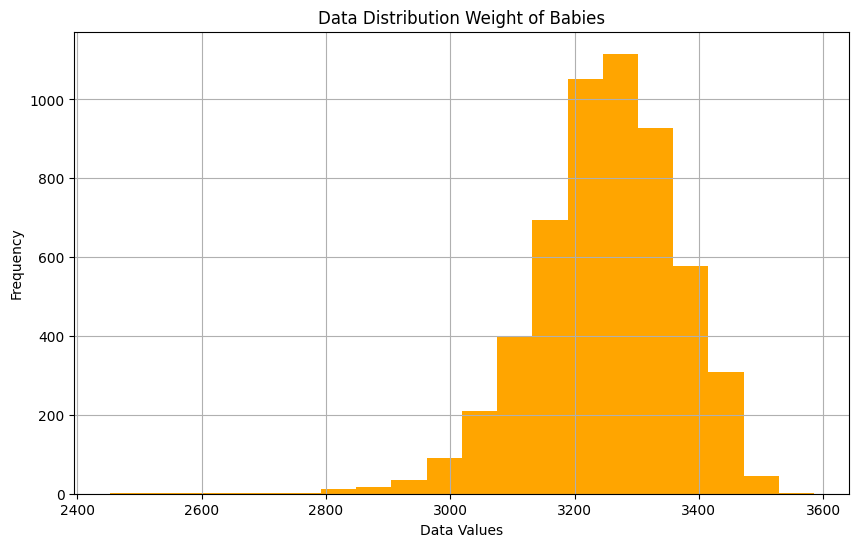

In [104]:
# Plot the histogram of the data
plt.figure(figsize=(10,6))
plt.hist(baby_weight_data, bins=20, color='orange')
plt.title("Data Distribution Weight of Babies")
plt.xlabel("Data Values")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [105]:

# Find anomalies in the data
anomalies_2 = find_anomalies(baby_weight_data)

print(anomalies_2)

lower limit= 2907.55059675
upper limit= 3594.22465798
[2851.9, 2853.5, 2874.0, 2885.3, 2805.7, 2904.7, 2797.4, 2899.6, 2841.2, 2795.0, 2886.7, 2783.0, 2804.4, 2889.2, 2690.2, 2808.7, 2781.3, 2664.6, 2798.8, 2806.7, 2838.1, 2593.4, 2843.6, 2509.1, 2905.7, 2872.8, 2821.3, 2865.9, 2844.6, 2863.6, 2896.4, 2886.9, 2773.9, 2864.2, 2451.9, 2888.4, 2859.1, 2866.0]


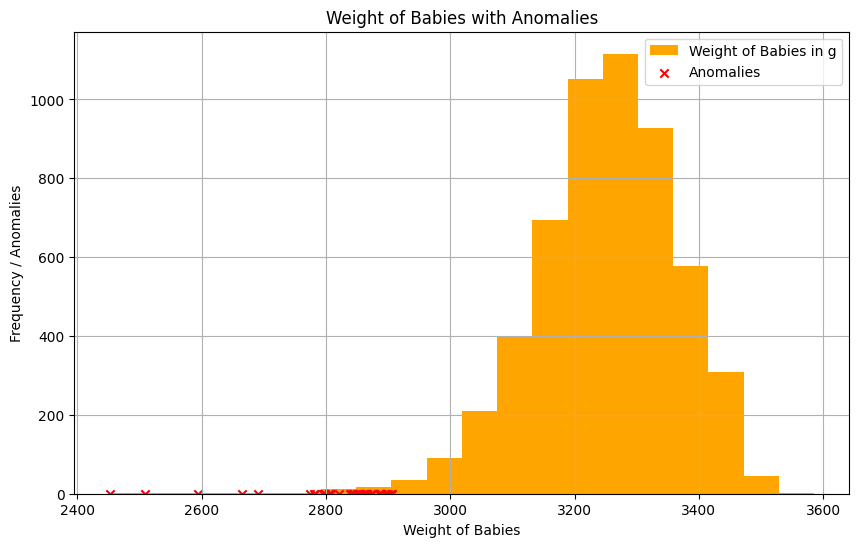

In [107]:
# Visualize the Data with Anomalies
plt.figure(figsize=(10,6))
plt.hist(baby_weight_data, bins=20, color='orange', label="Weight of Babies in g")
plt.scatter(anomalies_2, np.zeros_like(anomalies_2) - 0.01, color='red', label="Anomalies", marker='x')
plt.title("Weight of Babies with Anomalies")
plt.xlabel("Weight of Babies")
plt.ylabel("Frequency / Anomalies")
plt.legend()
plt.grid(True)
plt.show()

# Observation
The distribution is roughly symmetrical around the center, with the left and right tails being approximately equal in length. Therefore it can be considered normally distributed. The calculated anomalies (2851.9, 2853.5, 2874.0, 2885.3, 2805.7, 2904.7, 2797.4, 2899.6, 2841.2, 2795.0, 2886.7, 2783.0, 2804.4, 2889.2, 2690.2, 2808.7, 2781.3, 2664.6, 2798.8, 2806.7, 2838.1, 2593.4, 2843.6, 2509.1, 2905.7, 2872.8, 2821.3, 2865.9, 2844.6, 2863.6, 2896.4, 2886.9, 2773.9, 2864.2, 2451.9, 2888.4, 2859.1, 2866.0) are outside of 3 standard deviations from the mean. They are below the lower limit.

# Data Set 3: Renewable Power Production France

In [ ]:
#Access the dataset (Source = https://www.kaggle.com/datasets/henriupton/wind-solar-electricity-production)
url_3 = 'https://raw.githubusercontent.com/len-rtz/AML/refs/heads/main/data/intermittent-renewables-production-france.csv'

# Load the dataset
df_3 = pd.read_csv(url_3)

# Inspect the dataset to see the column names
print(df_3.columns)

Index(['Date and Hour', 'Date', 'StartHour', 'EndHour', 'Source', 'Production',
       'dayOfYear', 'dayName', 'monthName'],
      dtype='object')


In [ ]:
# Extract the production in MWh column and drop missing values
renewable_energy_data = df_3['Production'].dropna()

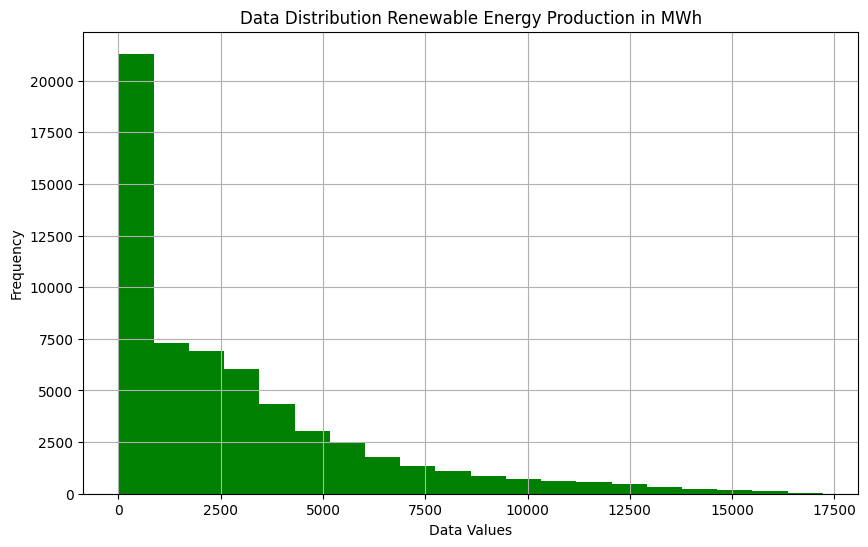

In [ ]:
# Plot the histogram of the data
plt.figure(figsize=(10,6))
plt.hist(renewable_energy_data, bins=20, color='green')
plt.title("Data Distribution Renewable Energy Production in MWh")
plt.xlabel("Data Values")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [ ]:
# Find anomalies in the data
anomalies_3 = find_anomalies(renewable_energy_data)

print(anomalies_3)

lower limit= -6777.77815485
upper limit= 12363.49770538
[12714.0, 12676.0, 12457.0, 12536.0, 12852.0, 12401.0, 12598.0, 12711.0, 12470.0, 12800.0, 13018.0, 12670.0, 12743.0, 12553.0, 12500.0, 12510.0, 13113.0, 12393.0, 12374.0, 14302.0, 12750.0, 13445.0, 12984.0, 12653.0, 13045.0, 12777.0, 13551.0, 12756.0, 12437.0, 12972.0, 12471.0, 12908.0, 12646.0, 12764.0, 12446.0, 12801.0, 13118.0, 12436.0, 12696.0, 13699.0, 13661.0, 13313.0, 13415.0, 12546.0, 12810.0, 12392.0, 12532.0, 12474.0, 13074.0, 13095.0, 12749.0, 12632.0, 13300.0, 13492.0, 13280.0, 13042.0, 13366.0, 13234.0, 12659.0, 12536.0, 12424.0, 12781.0, 13110.0, 12378.0, 12912.0, 12812.0, 12820.0, 12651.0, 12579.0, 12531.0, 12384.0, 13402.0, 13388.0, 13928.0, 12912.0, 13439.0, 13309.0, 13753.0, 13978.0, 13912.0, 13141.0, 13472.0, 12423.0, 13429.0, 12384.0, 13285.0, 12751.0, 13351.0, 14668.0, 14493.0, 14193.0, 13651.0, 13278.0, 13442.0, 12787.0, 13393.0, 13369.0, 12397.0, 12783.0, 12661.0, 12632.0, 12740.0, 12603.0, 12795.0, 12793.0

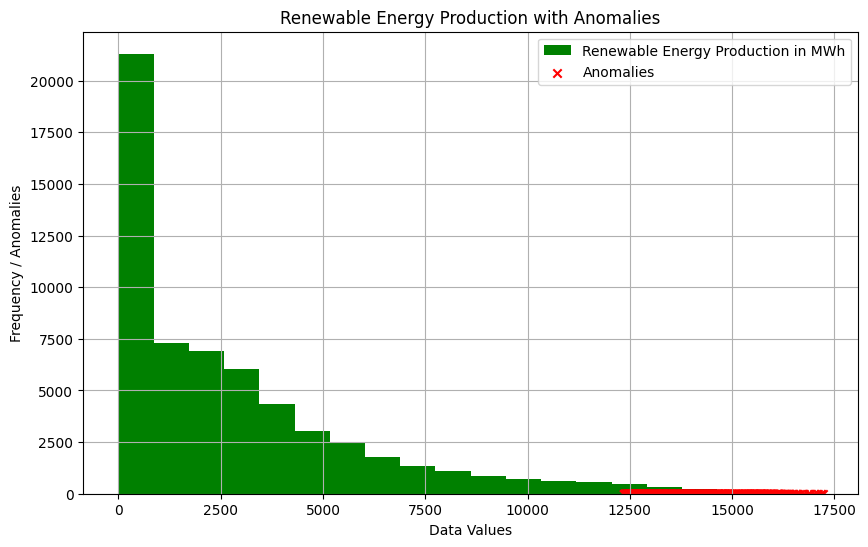

In [ ]:
# Visualize the Data with Anomalies
plt.figure(figsize=(10,6))
plt.hist(renewable_energy_data, bins=20, color='green', label="Renewable Energy Production in MWh")
plt.scatter(anomalies_3, np.zeros_like(anomalies_3) - 0.01, color='red', label="Anomalies", marker='x')
plt.title("Renewable Energy Production with Anomalies")
plt.xlabel("Data Values")
plt.ylabel("Frequency / Anomalies")
plt.legend()
plt.grid(True)
plt.show()

# Observation
Standard deviation seems not to be a reliable method for finding outliers in this not normally distributed data. The distribution is heavily skewed to the right, with a long tail. The mean is highly influenced by this. Therefore outliers / anomalies cannot be determined with accuracy.

# Conclusion
For normally distributed data, the 0.3% rule holds, meaning we can reliably detect outliers since 99.7% of the data should lie within three standard deviations from the mean. This method works well when there are enough observations to confirm the normal distribution.

However, for non-normal data, a different approach is needed to identify anomalies due to the different data distribution.